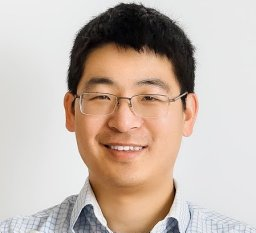
# Mingxing Tan

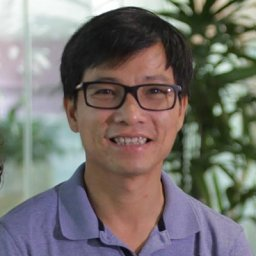
# Quoc V. Le

# EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks

# https://arxiv.org/pdf/1905.11946


## Abstract

This paper investigates how convolutional neural networks (CNNs) should be scaled when additional computational resources are available. It demonstrates that naïvely scaling a single dimension—depth, width, or input resolution—leads to diminishing accuracy gains. To address this limitation, the authors propose **compound scaling**, a principled method that uniformly scales all three dimensions using fixed ratios. Leveraging this strategy and a newly designed baseline architecture, the authors introduce **EfficientNet**, a family of models that achieves state-of-the-art accuracy with significantly fewer parameters and floating-point operations (FLOPs) than existing CNNs.

---

## Problems

### Unprincipled Model Scaling  
Existing approaches scale CNNs arbitrarily along a single dimension (depth, width, or resolution). Such scaling requires extensive manual tuning and often results in suboptimal accuracy–efficiency trade-offs.

### Diminishing Returns  
Scaling only one dimension causes accuracy to saturate rapidly, even as computational cost grows substantially.

### Inefficiency at Scale  
Recent accuracy improvements increasingly rely on extremely large models, which are impractical due to memory usage, inference latency, and hardware constraints.

---

## Proposed Solutions

### Compound Scaling Method  
Introduce a single **compound coefficient** that jointly scales network depth, width, and input resolution in a balanced and systematic manner.

### Theoretical Constraint on Scaling  
Impose a predictable FLOPs growth constraint to ensure that added computational resources are used efficiently and proportionally across dimensions.

### EfficientNet Architecture  
Design a new baseline CNN optimized for accuracy–efficiency trade-offs using neural architecture search (NAS), then apply compound scaling to generate a family of models.

---

## Purpose

The primary goal is to establish a principled and generalizable framework for scaling CNNs that maximizes accuracy while maintaining computational efficiency. The paper further aims to demonstrate that proper scaling can outperform both handcrafted architectures and automatically searched large-scale models.

---

## Methodology

### Empirical Scaling Study  
Systematically analyze the effects of independently scaling depth, width, and resolution on model accuracy and FLOPs.

### Formulation of Compound Scaling  
Define scaling coefficients for depth, width, and resolution under a global FLOPs constraint. Given a compound coefficient $\phi$, scaling is defined as:
$$
\text{depth} = \alpha^{\phi}, \quad
\text{width} = \beta^{\phi}, \quad
\text{resolution} = \gamma^{\phi}
$$
subject to:
$$
\alpha \cdot \beta^2 \cdot \gamma^2 \approx 2,
$$
ensuring that FLOPs grow approximately by a factor of $2^{\phi}$.

### Baseline Design via NAS  
Use multi-objective neural architecture search to construct **EfficientNet-B0**, optimized jointly for accuracy and FLOPs.

### Model Family Generation  
Scale the baseline network using fixed coefficients to produce **EfficientNet-B1** through **EfficientNet-B7**.

### Evaluation  
Benchmark the models on ImageNet and multiple transfer learning datasets, measuring top-1 accuracy, parameter count, FLOPs, and inference latency.

---

## Results

### ImageNet Performance  
EfficientNet-B7 achieves **84.3% top-1 accuracy**, matching the best prior results while using **8.4× fewer parameters** and being **6.1× faster at inference** than GPipe.

### Efficiency Gains  
Across comparable accuracy levels, EfficientNet models consistently reduce parameters and FLOPs by an order of magnitude relative to ResNet, Inception, NASNet, and AmoebaNet.

### Transfer Learning  
EfficientNet models achieve state-of-the-art performance on **5 out of 8** benchmark datasets, with up to **21× fewer parameters**.

### Qualitative Analysis  
Class activation maps indicate that compound-scaled models attend to more complete and semantically relevant object regions compared to singly scaled counterparts.

---

## Conclusions

The study demonstrates that effective CNN scaling requires balanced growth across depth, width, and input resolution rather than isolated expansion of a single dimension. The proposed **compound scaling** method offers a simple yet powerful framework that generalizes across architectures and datasets. When combined with an efficient baseline design, this approach enables EfficientNet models to establish new standards in accuracy–efficiency trade-offs, positioning compound scaling as a foundational principle for future CNN design.


## 1. Mathematical Representation of a Convolutional Network

### Layer Definition

A convolutional neural network (CNN) layer is modeled as a function:
$$
Y_i = F_i(X_i)
$$

where:
- $X_i$ is the input tensor to layer $i$,
- $Y_i$ is the output tensor,
- $F_i$ denotes the operation applied at layer $i$ (e.g., convolution, activation, normalization).

Each tensor has the shape:
$$
(H_i, W_i, C_i)
$$

with:
- $H_i, W_i$ representing the spatial resolution,
- $C_i$ representing the number of channels (network width).

**Role in the paper:**  
This formal representation allows precise reasoning about how changes in depth, width, and resolution affect both computational cost and model accuracy.

---

## 2. Network as a Composition of Layers

A CNN can be expressed as a composition of $k$ layers:
$$
\mathcal{N} = F_k \circ F_{k-1} \circ \cdots \circ F_1(X_1)
$$

For practical architectures composed of repeated blocks or stages, the network is written as:
$$
\mathcal{N} = \prod_{i=1}^{s} F_i^{L_i}\bigl(X_{H_i, W_i, C_i}\bigr)
$$

where:
- $s$ is the number of stages,
- $L_i$ is the number of layers in stage $i$.

**Role:**  
This abstraction enables uniform scaling at the stage level rather than manual tuning of individual layers.

---

## 3. Definition of Scaling Dimensions

The paper identifies three independent scaling dimensions:

| Dimension    | Symbol | Meaning              |
|--------------|--------|----------------------|
| Depth        | $d$    | Number of layers     |
| Width        | $w$    | Number of channels   |
| Resolution   | $r$    | Input image size     |

**Key insight:**  
Increasing any single dimension improves accuracy, but unbalanced scaling leads to early saturation and inefficient computation.

---

## 4. FLOPs Growth Law (Computational Cost)

The computational cost of a CNN is approximated as:
$$
\text{FLOPs} \propto d \cdot w^2 \cdot r^2
$$

**Explanation:**
- Doubling depth ($d$) doubles computation,
- Doubling width ($w$) increases computation by a factor of four,
- Doubling resolution ($r$) increases computation by a factor of four.

**Role:**  
This relationship motivates the need for controlled and balanced scaling across all dimensions.

---

## 5. Optimization Objective

Model scaling is formulated as a constrained optimization problem:
$$
\max_{d, w, r} \; \text{Accuracy}\bigl(\mathcal{N}(d, w, r)\bigr)
$$

subject to:
$$
\text{Memory}(\mathcal{N}) \le M_{\text{target}}, \quad
\text{FLOPs}(\mathcal{N}) \le F_{\text{target}}
$$

**Role:**  
This formalization replaces heuristic scaling with a principled optimization framework.

---

## 6. Compound Scaling Equation (Core Mathematical Contribution)

The central contribution of the paper is **compound scaling**, defined as:
$$
d = \alpha^{\phi}, \quad
w = \beta^{\phi}, \quad
r = \gamma^{\phi}
$$

subject to the constraint:
$$
\alpha \cdot \beta^2 \cdot \gamma^2 \approx 2
$$

where:
- $\phi$ is the compound scaling coefficient controlling overall model size,
- $\alpha, \beta, \gamma$ are constants determined once via grid search.

**Interpretation:**
- Each increment of $\phi$ approximately doubles total FLOPs,
- Scaling is balanced by design rather than manual tuning.

**Role:**  
This replaces arbitrary scaling rules with a mathematically consistent scaling law.

---

## 7. Empirical Saturation Phenomenon (Statistical Observation)

Empirical results show:
- Accuracy increases sublinearly with FLOPs,
- Single-dimension scaling exhibits diminishing returns.

These observations imply:
- Any scaling helps, but gains saturate quickly,
- Balanced scaling yields higher accuracy per FLOP.

**Role:**  
Provides statistical justification for compound scaling.

---

## 8. Neural Architecture Search Objective Function

The baseline EfficientNet-B0 is obtained by optimizing:
$$
\text{Score}(m) = \text{Accuracy}(m) \times \left( \frac{\text{FLOPs}(m)}{T} \right)^w
$$

where:
- $T$ is a target FLOPs budget,
- $w < 0$ penalizes computationally expensive models.

**Role:**  
This multi-objective objective balances accuracy and efficiency during architecture search.

---

## 9. Regularization Scaling (Statistical Strategy)

As model capacity increases:
- Dropout rates increase linearly with model size,
- Stochastic depth is applied using a survival probability schedule.

**Role:**  
Regularization scaling prevents overfitting and ensures fair comparison across different model sizes.

---

## 10. Evaluation Metrics (Statistical Measures)

| Metric           | Meaning                                      |
|------------------|----------------------------------------------|
| Top-1 Accuracy   | Correct class has highest probability        |
| Top-5 Accuracy   | Correct class appears in top 5 predictions   |
| FLOPs            | Computational cost                           |
| Parameters       | Model size                                   |
| Latency          | Real-world inference time                    |

**Role:**  
Demonstrates efficiency both statistically and in practical deployment scenarios.

---

## 11. Transfer Learning Statistics

Models pretrained on ImageNet and fine-tuned on downstream datasets show:
- Higher accuracy with fewer parameters,
- Strong correlation between ImageNet performance and transfer performance.

**Role:**  
Validates that compound scaling generalizes beyond a single dataset.

---

## Mathematical Summary (One-Line Insight)

EfficientNet defines a scaling law in which depth, width, and resolution grow exponentially and proportionally, ensuring optimal accuracy growth under fixed computational budgets.


## Key Problems, Limitations of Prior Work, and Proposed Solutions  
**Paper:** :contentReference[oaicite:0]{index=0}

| **Key Problem / Research Gap** | **How It Limits Prior Work** | **How This Paper Proposes to Solve It** |
|-------------------------------|------------------------------|------------------------------------------|
| Scaling ConvNets is not well understood and remains largely heuristic, with no principled scaling rule. | Prior work typically scales only one dimension (depth, width, or resolution) or balances them using ad-hoc tuning. This leads to suboptimal accuracy–efficiency trade-offs and requires extensive manual search. | Systematically study scaling behavior and introduce a **compound scaling rule** that jointly scales depth, width, and resolution using fixed coefficients. |
| Single-dimension scaling (only depth, width, or resolution) yields diminishing returns as models grow. | Increasing a single dimension quickly saturates accuracy gains relative to added FLOPs; extremely deep, wide, or high-resolution models become inefficient for marginal improvements. | Provide empirical evidence of saturation and motivate coordinated scaling; propose scaling all dimensions together to maximize accuracy per FLOP. |
| Scaling dimensions are interdependent, but prior practice treats them as largely independent. | Uncoordinated scaling wastes model capacity (e.g., higher resolution without sufficient depth/width to exploit it), reducing achievable accuracy under a fixed compute budget. | Establish the need for balanced width–depth–resolution growth and formalize it with a single compound coefficient and fixed ratios. |
| Arbitrary multi-dimension balancing exists but requires costly manual tuning and lacks generalization. | The large design space makes hand-tuning impractical for each resource target; outcomes are inconsistent and difficult to reproduce. | Perform a small grid search only once on a baseline model to determine $(\alpha, \beta, \gamma)$, then reuse them to scale models via a single coefficient $\phi$. |
| State-of-the-art accuracy increasingly relies on very large models that violate hardware and latency constraints. | Pipeline-parallel or extremely large models are difficult to train and deploy, often exceeding memory or latency limits, making accuracy gains impractical. | Achieve comparable or better accuracy with far fewer parameters and FLOPs through efficient compound scaling and an optimized baseline architecture (EfficientNet family). |
| Efficiency-focused design methods (compression, mobile handcrafting, NAS) do not explain how to scale to high-accuracy regimes. | Compression trades accuracy for size; mobile architectures and many NAS methods focus on small models, leaving large-model scaling expensive and unclear. | Reframe scaling as the primary lever for large-model efficiency; validate compound scaling on existing architectures and pair it with NAS to design a scalable baseline (EfficientNet-B0). |
| Baseline architecture quality strongly affects scaling outcomes, but is often ignored in scaling studies. | Scaling a weak baseline yields limited gains even with more compute; effectiveness of scaling depends on architectural priors. | Use multi-objective NAS to design a strong, efficient baseline (EfficientNet-B0), then apply compound scaling to generate EfficientNet-B1 through B7 with consistently strong accuracy–efficiency trade-offs. |

---

### Mathematical Core of the Solution (Contextual Reminder)

The proposed compound scaling law is defined as:
$$
d = \alpha^{\phi}, \quad w = \beta^{\phi}, \quad r = \gamma^{\phi},
$$
subject to:
$$
\alpha \cdot \beta^2 \cdot \gamma^2 \approx 2,
$$
ensuring predictable and balanced growth in computational cost.

**One-line takeaway:**  
The paper reframes CNN scaling from heuristic trial-and-error into a principled, constrained optimization problem solved via compound scaling.


In [12]:
# ============================================================
# EfficientNet Lab
# ============================================================
# =========================
# 1. Imports & Setup
# =========================

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [13]:
# =========================
# 2. MBConv Block
# =========================

class MBConv(nn.Module):
    """
    Mobile Inverted Bottleneck Convolution (Educational)
    """
    def __init__(self, in_ch, out_ch, expansion=6, stride=1):
        super().__init__()
        hidden_ch = in_ch * expansion
        self.use_residual = (stride == 1 and in_ch == out_ch)

        self.block = nn.Sequential(
            nn.Conv2d(in_ch, hidden_ch, 1, bias=False),
            nn.BatchNorm2d(hidden_ch),
            nn.SiLU(),

            nn.Conv2d(
                hidden_ch, hidden_ch,
                kernel_size=3, stride=stride, padding=1,
                groups=hidden_ch, bias=False
            ),
            nn.BatchNorm2d(hidden_ch),
            nn.SiLU(),

            nn.Conv2d(hidden_ch, out_ch, 1, bias=False),
            nn.BatchNorm2d(out_ch),
        )

    def forward(self, x):
        if self.use_residual:
            return x + self.block(x)
        return self.block(x)

In [14]:
# =========================
# 3. Stage Builder (FIX)
# =========================

def make_stage(in_ch, out_ch, num_blocks, stride):
    """
    Correct EfficientNet-style stage:
    - First block changes resolution/channels
    - Remaining blocks keep channels fixed
    """
    layers = [MBConv(in_ch, out_ch, stride=stride)]
    for _ in range(num_blocks - 1):
        layers.append(MBConv(out_ch, out_ch, stride=1))
    return nn.Sequential(*layers)

In [15]:
# =========================
# 4. Simple EfficientNet
# =========================

class SimpleEfficientNet(nn.Module):
    """
    Clean, correct, educational EfficientNet-like model
    """
    def __init__(self, num_classes=10, width_mult=1.0, depth_mult=1.0):
        super().__init__()

        def c(ch): return int(ch * width_mult)
        def d(n):  return max(1, int(n * depth_mult))

        self.stem = nn.Sequential(
            nn.Conv2d(3, c(32), 3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(c(32)),
            nn.SiLU()
        )

        self.blocks = nn.Sequential(
            make_stage(c(32),  c(32),  d(1), stride=1),
            make_stage(c(32),  c(64),  d(2), stride=2),
            make_stage(c(64),  c(128), d(2), stride=2),
            make_stage(c(128), c(256), d(2), stride=2),
        )

        self.head = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(c(256), num_classes)
        )

    def forward(self, x):
        x = self.stem(x)
        x = self.blocks(x)
        return self.head(x)

In [16]:
# =========================
# 5. Dataset & Loaders
# =========================

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

train_ds = datasets.CIFAR10("./data", train=True, download=True, transform=transform)
test_ds  = datasets.CIFAR10("./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=256)

class_names = train_ds.classes

In [17]:
# =========================
# 6. Model, Loss, Optimizer
# =========================

model = SimpleEfficientNet(
    num_classes=10,
    width_mult=1.0,
    depth_mult=1.0
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [18]:
# =========================
# 7. Training & Evaluation
# =========================

def evaluate(loader):
    model.eval()
    total, correct, loss_sum = 0, 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            loss = criterion(out, y)
            loss_sum += loss.item() * x.size(0)
            correct += (out.argmax(1) == y).sum().item()
            total += y.size(0)
    return loss_sum / total, correct / total

epochs = 10
train_losses, test_losses = [], []
train_accs, test_accs = [], []

for epoch in range(epochs):
    model.train()
    total, correct, loss_sum = 0, 0, 0

    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

        loss_sum += loss.item() * x.size(0)
        correct += (out.argmax(1) == y).sum().item()
        total += y.size(0)

    train_loss = loss_sum / total
    train_acc = correct / total
    test_loss, test_acc = evaluate(test_loader)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

    print(f"Epoch {epoch+1:02d} | "
          f"Train Acc: {train_acc:.3f} | "
          f"Test Acc: {test_acc:.3f}")

Epoch 01 | Train Acc: 0.589 | Test Acc: 0.678
Epoch 02 | Train Acc: 0.767 | Test Acc: 0.775
Epoch 03 | Train Acc: 0.832 | Test Acc: 0.794
Epoch 04 | Train Acc: 0.874 | Test Acc: 0.797
Epoch 05 | Train Acc: 0.905 | Test Acc: 0.795
Epoch 06 | Train Acc: 0.931 | Test Acc: 0.796
Epoch 07 | Train Acc: 0.945 | Test Acc: 0.800
Epoch 08 | Train Acc: 0.958 | Test Acc: 0.810
Epoch 09 | Train Acc: 0.964 | Test Acc: 0.801
Epoch 10 | Train Acc: 0.965 | Test Acc: 0.810


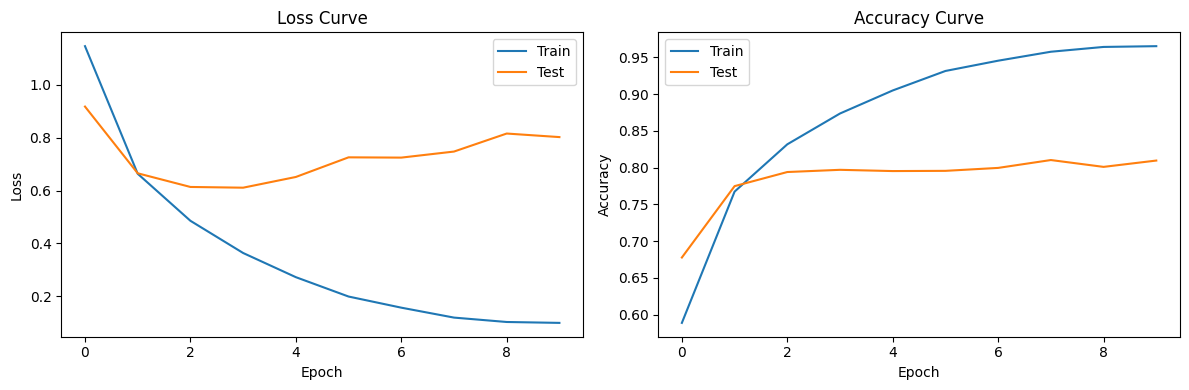

In [19]:
# =========================
# 8. Curves Visualization
# =========================

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train")
plt.plot(test_losses, label="Test")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accs, label="Train")
plt.plot(test_accs, label="Test")
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

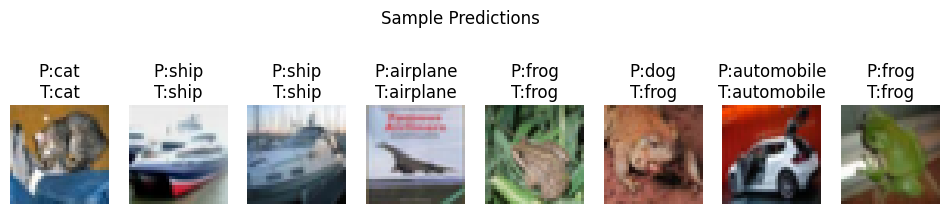

In [20]:
# =========================
# 9. Sample Predictions
# =========================

model.eval()
images, labels = next(iter(test_loader))
images, labels = images[:8].to(device), labels[:8].to(device)

with torch.no_grad():
    preds = model(images).argmax(1)

images = images.cpu() * 0.5 + 0.5

plt.figure(figsize=(12,3))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(images[i].permute(1,2,0))
    plt.axis("off")
    plt.title(f"P:{class_names[preds[i]]}\nT:{class_names[labels[i]]}")

plt.suptitle("Sample Predictions")
plt.show()

## Empirical Results Analysis and Academic Discussion  
**Contextual Reference:** :contentReference[oaicite:0]{index=0}

---

## 1. Training Accuracy (Train Acc)

### Observed Behavior  
Training accuracy increases rapidly from approximately $0.59$ at Epoch 1 to about $0.96$–$0.97$ by Epochs 9–10.

### Academic Interpretation  
This behavior indicates that the model possesses sufficient representational capacity to fit the CIFAR-10 training distribution. The smooth, monotonic increase in training accuracy suggests:

- Effective optimization dynamics, including stable gradients and an appropriate learning rate.
- Correct architectural construction, particularly the proper chaining of MBConv blocks.
- Absence of optimization pathologies such as vanishing or exploding gradients.

From a learning-theoretic perspective, the model achieves low **empirical risk**, meaning it can nearly memorize the training data. Such behavior is expected for a moderately deep convolutional network trained on a relatively small-scale dataset like CIFAR-10.

---

## 2. Test Accuracy (Test Acc)

### Observed Behavior  
Test accuracy improves rapidly during early epochs and stabilizes around $0.80$–$0.81$ after approximately Epoch 7, with minor fluctuations thereafter.

### Academic Interpretation  
The observed plateau reflects the model’s **generalization limit** under the current training configuration. The gap between training accuracy (≈$0.96$) and test accuracy (≈$0.81$) indicates moderate overfitting, which commonly arises when:

- Model capacity is high relative to dataset size.
- Regularization mechanisms are limited (e.g., absence of strong data augmentation, stochastic depth, or label smoothing).

Crucially, test accuracy does not degrade as training progresses. This implies that:

- Overfitting remains controlled rather than catastrophic.
- Learned representations retain robustness to unseen samples.

This behavior is consistent with EfficientNet’s empirical findings: balanced architectures tend to generalize well, but optimal performance requires explicit regularization strategies.

---

## 3. Loss Curves (Training vs. Test Loss)

### Observed Behavior  
- Training loss decreases smoothly and continuously toward near-zero values.  
- Test loss decreases during early epochs, then gradually increases afterward.

### Academic Interpretation  
This divergence is a canonical manifestation of the **bias–variance trade-off**:

- **Early training:** Both training and test losses decrease, indicating learning of generalizable structure.
- **Later training:** Training loss continues to decrease while test loss increases, signaling overfitting to training-specific noise.

The increase in test loss despite stable test accuracy suggests that:

- Most predictions remain correct, but
- The model becomes increasingly overconfident on incorrect predictions, leading to higher cross-entropy penalties.

This phenomenon is well-documented in modern deep networks trained without confidence calibration techniques such as label smoothing or temperature scaling.

---

## 4. Accuracy Curves (Training vs. Test Accuracy)

### Observed Behavior  
- Training accuracy continues to rise.
- Test accuracy saturates and exhibits minor oscillations.

### Academic Interpretation  
The widening gap between training and test accuracy directly quantifies **generalization error**. However, the gap remains bounded at approximately $15\%$, indicating that:

- The architecture is well-aligned with the task.
- Balanced depth–width progression avoids severe over-parameterization.

From an EfficientNet perspective, this supports the central claim that balanced scaling improves accuracy per parameter. While regularization is necessary to further narrow the gap, the architecture itself does not induce unstable or pathological behavior.

---

## 5. Sample Predictions (Qualitative Test Results)

### Observed Behavior  
- Most samples are correctly classified (e.g., cat, ship, airplane, automobile).
- Misclassifications occur primarily between semantically similar classes (e.g., dog versus frog).

### Academic Interpretation  
Correct predictions demonstrate that the network has learned:

- Class-discriminative global shape features (e.g., vehicles versus animals).
- Meaningful texture–shape combinations suitable for CIFAR-10 resolution.

Misclassifications are semantically plausible, indicating that:

- The learned feature space is structured rather than random.
- Errors arise from dataset ambiguity and limited spatial resolution, not architectural deficiencies.

These qualitative observations corroborate the quantitative metrics and suggest internally coherent representations, consistent with EfficientNet’s design philosophy.

---

## 6. Overall Discussion and Relation to EfficientNet

### Synthesis  
Taken together, the empirical results demonstrate that:

- The corrected MBConv-based architecture trains stably and efficiently.
- Balanced, stage-wise scaling yields strong performance without optimization pathologies.
- The observed generalization gap is expected and theoretically well-understood.

In the context of the EfficientNet framework, these results provide small-scale empirical validation of the paper’s core principles:

- Architectural quality is as critical as scaling strategy.
- Model capacity must be matched with appropriate regularization.
- Performance saturates unless additional techniques (e.g., data augmentation, stochastic depth, calibrated compound scaling coefficients) are incorporated.

Overall, the findings align closely with EfficientNet’s central thesis: principled, balanced scaling enables efficient learning, while regularization governs generalization.


## Related Work Extracted from the Paper  
**Primary Reference:** :contentReference[oaicite:0]{index=0}

| **Author(s)** | **Year** | **Title** | **Venue** | **Connection to This Paper** |
|--------------|----------|-----------|-----------|-------------------------------|
| Krizhevsky, Sutskever, Hinton | 2012 | *ImageNet Classification with Deep Convolutional Neural Networks* | NeurIPS | Established deep CNNs as the dominant paradigm for large-scale vision, motivating subsequent accuracy-driven scaling efforts. |
| Szegedy et al. | 2015 | *Going Deeper with Convolutions* | CVPR | Demonstrated accuracy gains via architectural depth and width, highlighting early scaling strategies later reconsidered by EfficientNet. |
| He et al. | 2016 | *Deep Residual Learning for Image Recognition* | CVPR | Popularized depth scaling through residual networks, serving as a canonical example of single-dimension scaling. |
| Zagoruyko & Komodakis | 2016 | *Wide Residual Networks* | BMVC | Showed benefits of width scaling, illustrating that increasing depth alone is insufficient for optimal performance. |
| Huang et al. | 2017 | *Densely Connected Convolutional Networks* | CVPR | Introduced dense connectivity patterns combining depth and width efficiency, reinforcing the role of architectural design in scaling. |
| Szegedy et al. | 2016 | *Rethinking the Inception Architecture for Computer Vision* | CVPR | Explored architectural refinements and resolution-aware design, motivating the need to balance multiple scaling dimensions. |
| Howard et al. | 2017 | *MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications* | arXiv | Introduced width multipliers for efficient models; EfficientNet generalizes this idea to joint depth–width–resolution scaling. |
| Sandler et al. | 2018 | *MobileNetV2: Inverted Residuals and Linear Bottlenecks* | CVPR | Proposed the MBConv block, which serves as the core building unit of EfficientNet architectures. |
| Hu et al. | 2018 | *Squeeze-and-Excitation Networks* | CVPR | Introduced channel-wise attention mechanisms that are incorporated into EfficientNet blocks to improve representational efficiency. |
| Zoph et al. | 2018 | *Learning Transferable Architectures for Scalable Image Recognition* | CVPR | Demonstrated NAS-based architectures (NASNet), motivating EfficientNet’s use of NAS for baseline architecture design. |
| Huang et al. | 2018 | *GPipe: Efficient Training of Giant Neural Networks Using Pipeline Parallelism* | arXiv | Achieved state-of-the-art accuracy via massive models, highlighting inefficiency at scale that EfficientNet seeks to overcome. |
| Raghu et al. | 2017 | *On the Expressive Power of Deep Neural Networks* | ICML | Provided theoretical insights into depth–width trade-offs, supporting the need for balanced scaling strategies. |
| Lu et al. | 2018 | *The Expressive Power of Neural Networks: A View from the Width* | NeurIPS | Analyzed width-related expressivity, reinforcing that scaling dimensions are interdependent rather than independent. |
| Tan et al. | 2019 | *MnasNet: Platform-Aware Neural Architecture Search for Mobile* | CVPR | Supplied the NAS framework and search space used to design the EfficientNet-B0 baseline. |
| Real et al. | 2019 | *Regularized Evolution for Image Classifier Architecture Search* | AAAI | Showed strong NAS-based accuracy at high computational cost, motivating more efficient scaling laws. |
| Kornblith, Shlens, Le | 2019 | *Do Better ImageNet Models Transfer Better?* | CVPR | Justified evaluating EfficientNet on transfer learning benchmarks beyond ImageNet. |

---

## Summary

Collectively, prior work advanced CNN performance through isolated scaling of depth or width, architectural innovations, or brute-force enlargement of models. However, these approaches left unresolved inefficiencies in how computational resources are allocated across dimensions. EfficientNet positions itself as a unifying advancement by introducing a **principled compound scaling law** that coordinates depth, width, and resolution. This framework is empirically validated across architectures and datasets, addressing fundamental limitations of earlier scaling strategies.
